# **📊Estudo Analitico sobre Clientes Solicitando Desconexao**

### **✅ Visão Geral do Estudo**

O objetivo deste projeto é realizar análises detalhadas utilizando a base de dados de desconexao consolidada. Desta forma, podemos fornecer padrões, tendências e relações entre as variáveis. Certamente, As análises ajudarão a responder perguntas específicas e fornecerão insights que podem ser utilizados para tomar decisões informadas. Importante salientar, que o projeto utiliza técnicas de Ciência e Análise de dados e atráves disso possamos chegar em melhores resultados e ter um modelo de estudo analitico mais eficiente e que seja mais rentavel para o négocio principal da empresa.

### **✅ Escopo**

Este notebook é dedicado à etapa de modelagem do modelo de machine learning, com foco na aplicação do algoritmo de clusterização K-Means. A partir dos dados previamente tratados e analisados, são realizadas etapas de padronização, definição do número ideal de clusters e construção do modelo. Além disso, são aplicadas métricas de avaliação como a inércia, o coeficiente de silhueta e a visualização dos agrupamentos, com o objetivo de validar a coerência e a qualidade dos clusters formados. Esta etapa visa segmentar os dados de forma significativa, contribuindo para uma melhor interpretação dos padrões encontrados.

In [1]:
import pandas as pd
import numpy as np
import openpyxl as px
import matplotlib as plt
import seaborn as sns
import pyodbc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
import pyodbc

try:
    conn = pyodbc.connect(
        'Driver={ODBC Driver 17 for SQL Server};'
        'Server=SNEPDB56C01;'
        'Database=BDS;'
        'Trusted_Connection=yes;'
    )

    query = """
    SELECT 
        COD_CONTRATO AS CÓDIGO_CONTRATO,
        NUM_CPF_CNPJ_CLIENTE AS CPF_CNPJ_CLIENTE,
        TECNOLOGIA AS TECNOLOGIA,
        UF,
        DT_INSTALACAO AS DATA_INSTALACAO,
        AGING_DIAS_GROSS_CHURN AS DIAS_BASE_CHURN,
        FL_EXISTE_ORDEM_DESCONEXAO AS FLAG_ORDEM_DESCONEXAO,
        ORIGEM_SOLICITACAO AS ORIGEM_SOLICITACAO,
        TIPO_SOLICITACAO AS TIPO_SOLICITACAO,
        MAX_DATA_CRIACAO_SR AS DATA_CRIACAO,
        MAX_MOTIVO_MACRO_MINI_CRM AS MOTIVO_CANCELAMENTO_VISAO_MACRO,   
        MAX_MOTIVO_CANC_MINI_CRM AS MOTIVO_CANCELAMENTO_VISAO_MICRO,
        QTD_PROTOCOLOS AS QUANTIDADE_PROTOCOLOS,
        FLG_RETIDO AS FLAG_RETIDO,
        MESES_AGING_BASE
    FROM 
        VW_ATENDIMENTO_ORDEM_DESCONEXAO_CONSOLIDADO
    WHERE
	    MAX_DATA_CRIACAO_SR between '2025-01-01' AND '2025-04-30' 
	    AND MAX_MOTIVO_CANC_MINI_CRM IS NOT NULL
	    AND MAX_MOTIVO_MACRO_MINI_CRM IS NOT NULL
    ORDER BY 
	    DATA_INSTALACAO DESC
"""
    Base_Clientes_Desconexao_Detalhado = pd.read_sql(query, conn)

    print(Base_Clientes_Desconexao_Detalhado.head())  

finally:
    conn.close() 
    print("Conexão encerrada.")

C:\Users\F8090067\AppData\Local\Temp\ipykernel_10928\757550758.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Base_Clientes_Desconexao_Detalhado = pd.read_sql(query, conn)


  CÓDIGO_CONTRATO  CPF_CNPJ_CLIENTE TECNOLOGIA  UF DATA_INSTALACAO  \
0       355492454        5259110498       FTTH  PE      2025-04-30   
1       355490145       88285162168       FTTH  GO      2025-04-30   
2       355441775        5086113180       FTTH  DF      2025-04-30   
3       355492103        6683067937       FTTH  PR      2025-04-30   
4       355440760       96996404568       FTTH  BA      2025-04-29   

   DIAS_BASE_CHURN  FLAG_ORDEM_DESCONEXAO ORIGEM_SOLICITACAO TIPO_SOLICITACAO  \
0              0.0                      0        ATENDIMENTO           HUMANO   
1              0.0                      1        ATENDIMENTO           HUMANO   
2              0.0                      0        ATENDIMENTO           HUMANO   
3              0.0                      0        ATENDIMENTO           HUMANO   
4              1.0                      0        ATENDIMENTO           HUMANO   

  DATA_CRIACAO MOTIVO_CANCELAMENTO_VISAO_MACRO  \
0   2025-04-30                        RECO

In [3]:
Base_Clientes_Desconexao_Detalhado['DIAS_BASE_CHURN'] = Base_Clientes_Desconexao_Detalhado['DIAS_BASE_CHURN'].astype('Int64')

Base_Clientes_Desconexao_Detalhado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842797 entries, 0 to 1842796
Data columns (total 15 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   CÓDIGO_CONTRATO                  object        
 1   CPF_CNPJ_CLIENTE                 int64         
 2   TECNOLOGIA                       object        
 3   UF                               object        
 4   DATA_INSTALACAO                  object        
 5   DIAS_BASE_CHURN                  Int64         
 6   FLAG_ORDEM_DESCONEXAO            int64         
 7   ORIGEM_SOLICITACAO               object        
 8   TIPO_SOLICITACAO                 object        
 9   DATA_CRIACAO                     datetime64[ns]
 10  MOTIVO_CANCELAMENTO_VISAO_MACRO  object        
 11  MOTIVO_CANCELAMENTO_VISAO_MICRO  object        
 12  QUANTIDADE_PROTOCOLOS            int64         
 13  FLAG_RETIDO                      int64         
 14  MESES_AGING_BASE                 o

In [6]:
# Verificar a quantidade de nulos por coluna
print(Base_Clientes_Desconexao_Detalhado.isnull().sum())

# Remover linhas que possuem qualquer valor nulo
Base_Clientes_Desconexao_Detalhado_Clean = Base_Clientes_Desconexao_Detalhado.dropna()

# Verificar o tamanho após remoção
print('Tamanho original:', Base_Clientes_Desconexao_Detalhado.shape)
print('Tamanho após remoção:', Base_Clientes_Desconexao_Detalhado_Clean.shape)

CÓDIGO_CONTRATO                        0
CPF_CNPJ_CLIENTE                       0
TECNOLOGIA                         41830
UF                                 41830
DATA_INSTALACAO                    42050
DIAS_BASE_CHURN                    42050
FLAG_ORDEM_DESCONEXAO                  0
ORIGEM_SOLICITACAO                     0
TIPO_SOLICITACAO                       0
DATA_CRIACAO                           0
MOTIVO_CANCELAMENTO_VISAO_MACRO        0
MOTIVO_CANCELAMENTO_VISAO_MICRO        0
QUANTIDADE_PROTOCOLOS                  0
FLAG_RETIDO                            0
MESES_AGING_BASE                   42050
dtype: int64
Tamanho original: (1842797, 15)
Tamanho após remoção: (1800747, 15)


In [7]:
from sklearn.preprocessing import StandardScaler

# Seleção das variáveis
Base_Clientes_Cluster = Base_Clientes_Desconexao_Detalhado[[
    'DIAS_BASE_CHURN',
    'FLAG_ORDEM_DESCONEXAO',
    'QUANTIDADE_PROTOCOLOS',
]].copy()

# Remoção de valores nulos
Base_Clientes_Cluster_Clean = Base_Clientes_Cluster.dropna()

# Padronização dos dados
scaler = StandardScaler()
Base_Clientes_Cluster_scaled = scaler.fit_transform(Base_Clientes_Cluster_Clean)


Para 2 clusters, Silhouette Score é 0.4704
Para 3 clusters, Silhouette Score é 0.5101
Para 4 clusters, Silhouette Score é 0.5476
Para 5 clusters, Silhouette Score é 0.5545
Para 6 clusters, Silhouette Score é 0.5817
   Número de Clusters  Silhouette Score
0                   2            0.4704
1                   3            0.5101
2                   4            0.5476
3                   5            0.5545
4                   6            0.5817


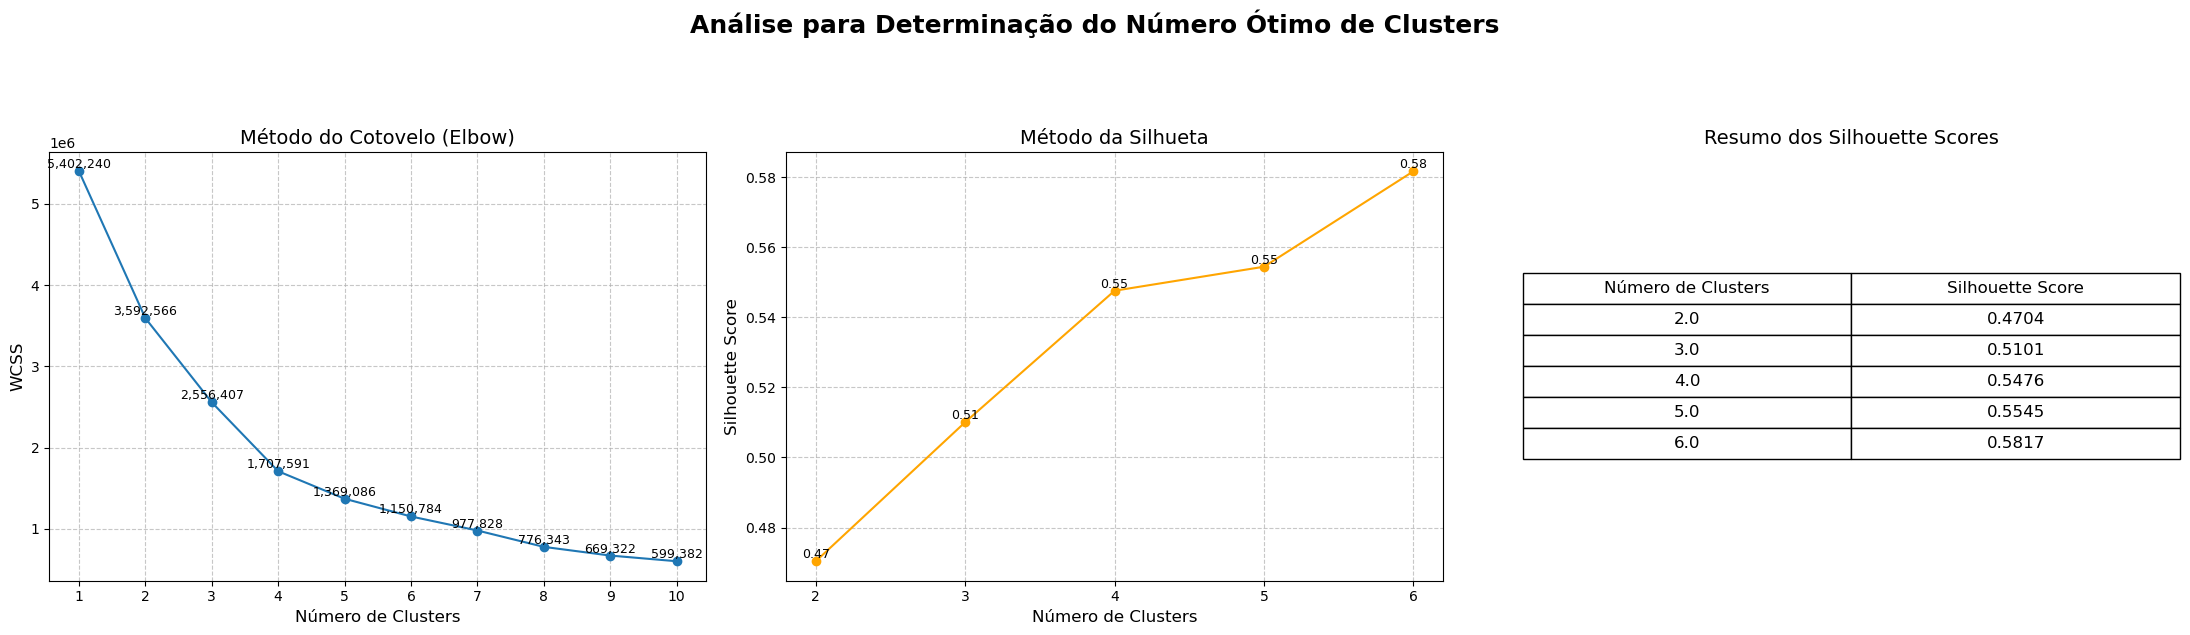

In [8]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# --- Cálculo do Método do Cotovelo (Elbow Method) ---
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(Base_Clientes_Cluster_scaled)
    wcss.append(kmeans.inertia_)

# --- Cálculo do Método da Silhueta (Silhouette Score) ---
silhouette_scores = []

# Amostragem para acelerar o cálculo
sample = resample(Base_Clientes_Cluster_scaled, n_samples=20000, random_state=42)

for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(sample)
    silhouette_avg = silhouette_score(sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para {n_clusters} clusters, Silhouette Score é {silhouette_avg:.4f}")

# --- Criação da Tabela Resumo dos Scores ---
df_scores = pd.DataFrame({
    'Número de Clusters': list(range(2, 7)),
    'Silhouette Score': [round(score, 4) for score in silhouette_scores]
})
print(df_scores)

# --- Geração dos Gráficos ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

fig.suptitle('Análise para Determinação do Número Ótimo de Clusters', fontsize=18, fontweight='bold', y=1.05)

# --- Elbow Method ---
axes[0].plot(range(1, 11), wcss, marker='o', linestyle='-')
axes[0].set_title('Método do Cotovelo (Elbow)', fontsize=14)
axes[0].set_xlabel('Número de Clusters', fontsize=12)
axes[0].set_ylabel('WCSS', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks(range(1, 11))

# Adicionando rótulos no Elbow
for x, y in zip(range(1, 11), wcss):
    axes[0].text(x, y, f'{int(y):,}', fontsize=9, ha='center', va='bottom')

# --- Silhouette Method ---
axes[1].plot(range(2, 7), silhouette_scores, marker='o', linestyle='-', color='orange')
axes[1].set_title('Método da Silhueta', fontsize=14)
axes[1].set_xlabel('Número de Clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks(range(2, 7))

# Adicionando rótulos no Silhouette
for x, y in zip(range(2, 7), silhouette_scores):
    axes[1].text(x, y, f'{y:.2f}', fontsize=9, ha='center', va='bottom')

# --- Tabela Resumo Visual ---
axes[2].axis('off')  # Remove os eixos
table = axes[2].table(
    cellText=df_scores.values,
    colLabels=df_scores.columns,
    loc='center',
    cellLoc='center'
)
table.scale(1, 2)  # Ajuste do tamanho da tabela
table.auto_set_font_size(False)
table.set_fontsize(12)
axes[2].set_title('Resumo dos Silhouette Scores', fontsize=14)

# Ajuste do layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

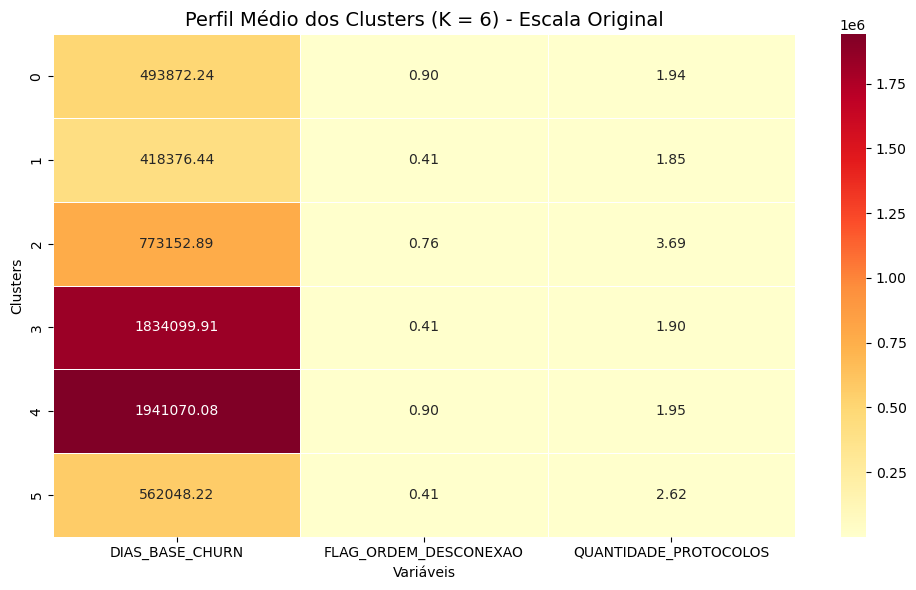

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔸 Aplicação do modelo KMeans com 6 clusters
kmeans_final = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(Base_Clientes_Cluster_scaled)

# 🔸 Criação do dataframe com os clusters atribuídos
Base_Clientes_Cluster_Clean_Clustered = Base_Clientes_Cluster_Clean.copy()
Base_Clientes_Cluster_Clean_Clustered['Cluster'] = clusters

# 🔸 Cálculo do perfil médio dos clusters (na escala padronizada)
perfil_clusters = Base_Clientes_Cluster_Clean_Clustered.groupby('Cluster').mean().round(2)

# 🔸 Desfazendo o scaling
perfil_clusters_original = scaler.inverse_transform(perfil_clusters)
perfil_clusters_original = pd.DataFrame(
    perfil_clusters_original,
    columns=perfil_clusters.columns,
    index=perfil_clusters.index
)

# 🔸 Plotando o heatmap na escala original
plt.figure(figsize=(10, 6))
sns.heatmap(perfil_clusters_original, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title('Perfil Médio dos Clusters (K = 6) - Escala Original', fontsize=14)
plt.xlabel('Variáveis')
plt.ylabel('Clusters')
plt.tight_layout()
plt.show()


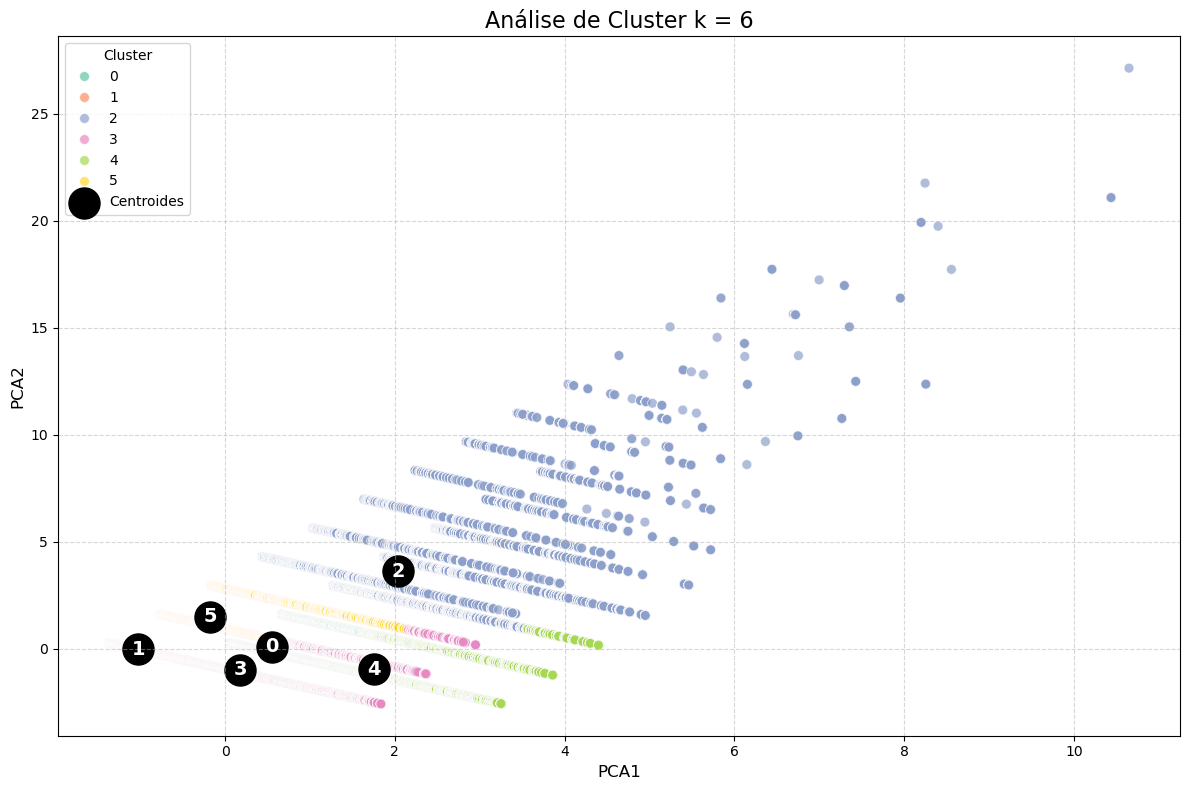

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Base_Clientes_Cluster_scaled)

# Transformar centróides para o espaço PCA
centroids = pca.transform(kmeans_final.cluster_centers_)

# Criar DataFrame para plotagem
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Plot dos dados com tamanho maior
plt.figure(figsize=(12, 8))  # Aumenta tamanho da figura
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    data=df_pca,
    palette='Set2',
    alpha=0.7,
    s=50  # Aumenta tamanho dos pontos
)

# Plot dos centróides
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=500, c='black', marker='o', label='Centroides')  # Aumenta tamanho dos centróides

# Rótulos nos centróides
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, str(i), fontsize=14, weight='bold', 
             color='white', ha='center', va='center')

# Customização
plt.title('Análise de Cluster k = 6', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

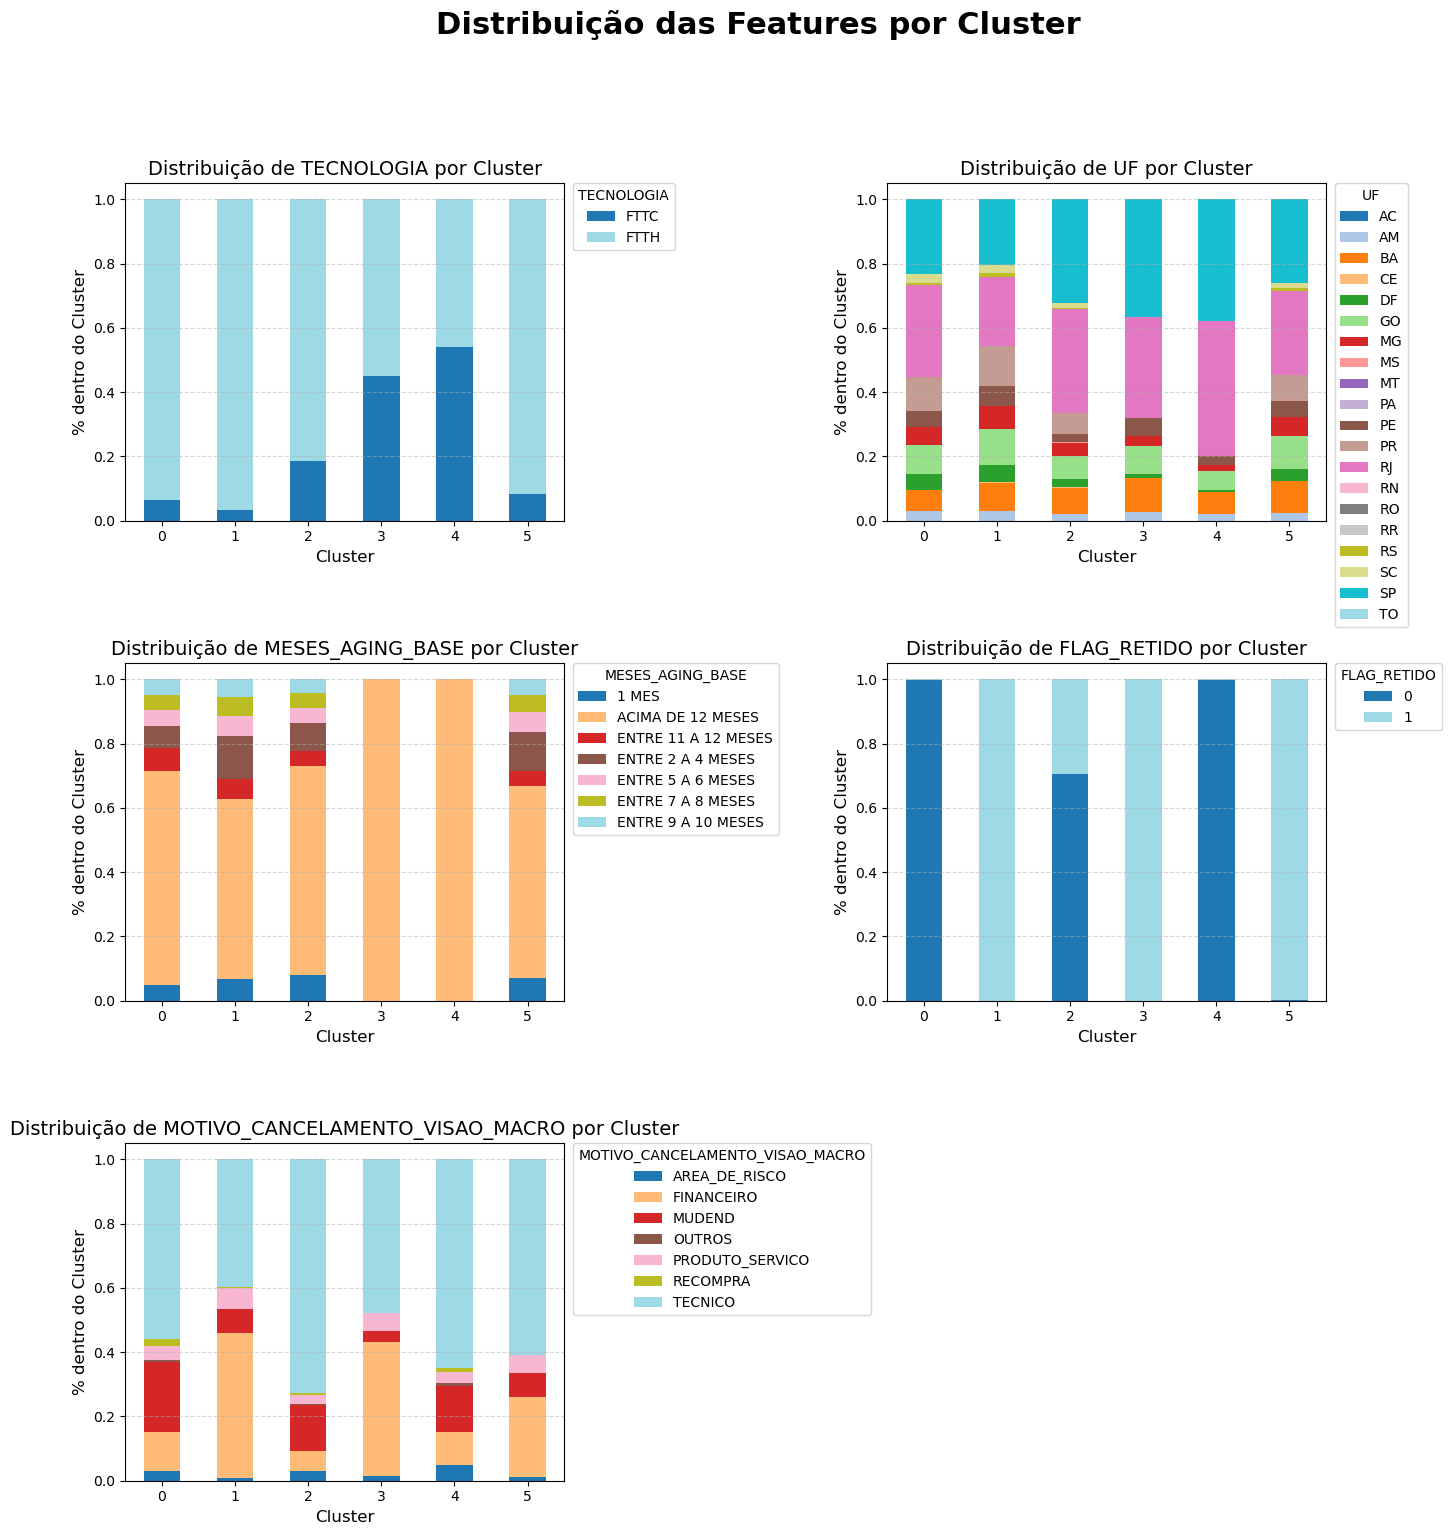

In [11]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# 🔸 Une a base original com os clusters criados
Base_Clientes_Completo = Base_Clientes_Desconexao_Detalhado.loc[Base_Clientes_Cluster_Clean.index].copy()
Base_Clientes_Completo['Cluster'] = clusters

# 🔸 Variáveis para analisar
columns_to_plot = ['TECNOLOGIA', 'UF', 'MESES_AGING_BASE', 'FLAG_RETIDO', 'MOTIVO_CANCELAMENTO_VISAO_MACRO']

# 🔸 Definição dos subplots
n_cols = 2
n_rows = math.ceil(len(columns_to_plot) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

fig.suptitle('Distribuição das Features por Cluster', fontsize=22, fontweight='bold', y=1.02)

# 🔸 Garante que axes seja uma lista (mesmo se for 1 linha ou 1 coluna)
axes = axes.flatten()

# 🔸 Loop para gerar os gráficos
for i, col in enumerate(columns_to_plot):

    dist = pd.crosstab(Base_Clientes_Completo['Cluster'], Base_Clientes_Completo[col], normalize='index')

    dist.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab20')

    axes[i].set_title(f'Distribuição de {col} por Cluster', fontsize=14)
    axes[i].set_ylabel('% dentro do Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=12)

    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

    axes[i].legend(title=col, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# 🔸 Desliga os plots extras
num_plots = len(columns_to_plot)
total_slots = len(axes)

if num_plots < total_slots:
    for j in range(num_plots, total_slots):
        axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.utils import resample

# 🔸 Avaliação com amostragem para o Silhouette
amostra = resample(Base_Clientes_Cluster_scaled, n_samples=20000, random_state=42)
labels_amostra = resample(clusters, n_samples=20000, random_state=42)


# 🔸 Avaliação no dataset completo com os clusters criados
silhouette = silhouette_score(amostra, labels_amostra)
calinski = calinski_harabasz_score(Base_Clientes_Cluster_scaled, clusters)
davies = davies_bouldin_score(Base_Clientes_Cluster_scaled, clusters)

# 🔸 Resultado
print('🔍 Avaliação do Modelo de Clusterização')
print(f'Silhouette Score (amostra): {silhouette:.4f} (quanto maior, melhor)')
print(f'Calinski-Harabasz Index: {calinski:.4f} (quanto maior, melhor)')
print(f'Davies-Bouldin Index: {davies:.4f} (quanto menor, melhor)')


🔍 Avaliação do Modelo de Clusterização
Silhouette Score (amostra): 0.5815 (quanto maior, melhor)
Calinski-Harabasz Index: 1330535.0150 (quanto maior, melhor)
Davies-Bouldin Index: 0.7957 (quanto menor, melhor)


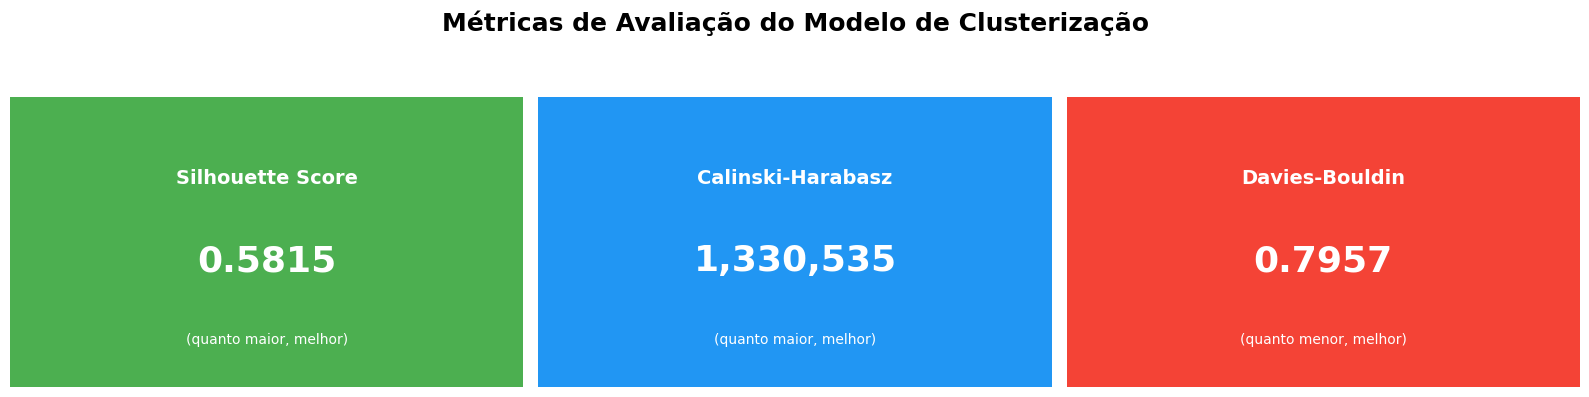

In [18]:
import matplotlib.pyplot as plt

# 🔸 Definir os dados
metricas = ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin']
valores = [0.5815, 1330535.015, 0.7957]
subtitulos = [
    '(quanto maior, melhor)',
    '(quanto maior, melhor)',
    '(quanto menor, melhor)'
]
cores = ['#4CAF50', '#2196F3', '#F44336']  # Verde, Azul, Vermelho

# 🔸 Criar o plot
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

fig.suptitle('Métricas de Avaliação do Modelo de Clusterização', fontsize=18, fontweight='bold')

for i in range(3):
    ax[i].set_facecolor(cores[i])
    ax[i].text(0.5, 0.7, metricas[i], fontsize=14, fontweight='bold', color='white', ha='center')
    ax[i].text(0.5, 0.4, f'{valores[i]:,.4f}' if i != 1 else f'{valores[i]:,.0f}', 
               fontsize=26, fontweight='bold', color='white', ha='center')
    ax[i].text(0.5, 0.15, subtitulos[i], fontsize=10, color='white', ha='center')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()



In [19]:
from joblib import dump, load

# 🔸 Salvar o modelo KMeans
dump(kmeans_final, 'modelo_kmeans.joblib')

# 🔸 Salvar o scaler (StandardScaler)
dump(scaler, 'scaler_cluster.joblib')

# 🔸 Opcional: salvar também o objeto PCA usado para visualização
dump(pca, 'pca_visualizacao.joblib')

print("Modelo, scaler e PCA salvos com sucesso!")


Modelo, scaler e PCA salvos com sucesso!
